In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import json
sns.set_style("darkgrid")

pd.options.display.max_rows = 100
pd.options.display.min_rows = 40

In [2]:
data = {}

In [3]:
agressions = pd.read_json('../inputs/20200924/DOLV20_2020_09_24_trades.json', orient='records')
agressions.T = pd.to_datetime(agressions['T'],format='%b %d, %Y %I:%M:%S %p' )
quotes = []
with open('../inputs/20200924/dolv20_quotes.json','r') as file:
    file_content = json.loads(file.read()) 
    
for content in file_content:
    quotes.append(content['values'])

#df.rename(columns={'QT':'lots','P':'price',''})
#df.sort_values('T',inplace=True)
#df.set_index('T',inplace=True)

In [4]:
#quotes = pd.read_json('../inputs/20200924/dolv20_quotes.json', orient='records')


In [5]:
columns={'0':'last_trade','1':'date','2':'last_price','3':'best_offer_buy','4':'best_offer_sell','5':'last_trade_time','6':'actual_trade_quantity',
         '7':'last_trade_quantity','8':'all_trades_quantrity','11':'max','12':'min','13':'close','14':'open','21':'variation','42':'average',
         '60':'broker_best_buy_offer','61':'broker_best_sell_offer','62':'last_broker_buy','63':'last_broker_sell'}
quotes_df = pd.DataFrame(quotes,columns=columns)
quotes_df.rename(columns=columns,inplace=True)

In [7]:
#quotes_df.to_dict(orient='records')

In [8]:
quotes_df.tail()

,last_trade,date,last_price,best_offer_buy,best_offer_sell,last_trade_time,actual_trade_quantity,last_trade_quantity,all_trades_quantrity,max,min,close,open,variation,average,broker_best_buy_offer,broker_best_sell_offer,last_broker_buy,last_broker_sell
42975,17:59:56,NaN,NaN,NaN,"5.511,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN
42976,17:59:56,NaN,NaN,NaN,"5.511,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42977,17:59:57,NaN,"5.509,000","5.510,000","5.510,500",17:59:57,5,5,50.438,NaN,NaN,NaN,NaN,-1.4755,"5.557,2803",85,1618,85,120
42978,17:59:57,NaN,"5.510,000",NaN,"5.510,500",NaN,10,10,50.439,NaN,NaN,NaN,NaN,-1.4576,"5.557,279",NaN,127,NaN,1618
42979,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data['agressions'] = agressions.to_dict(orient='records')
data['quotes'] = quotes_df.to_dict(orient='records')

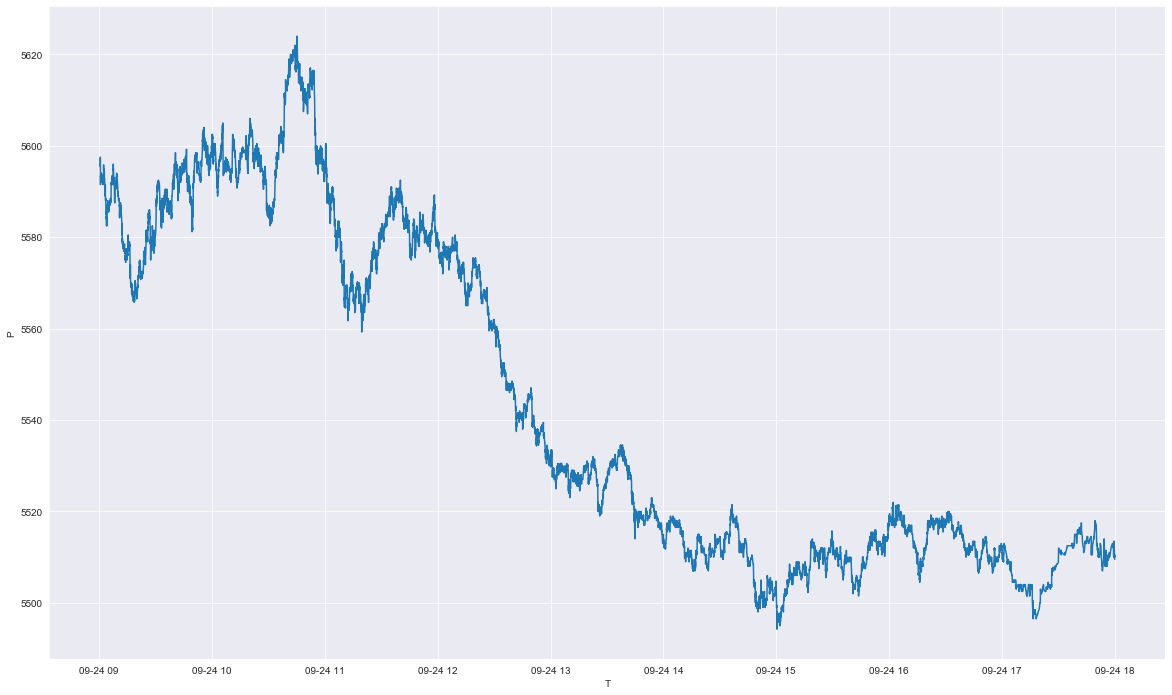

In [158]:
plt.figure(figsize=(20,12))
sns.lineplot(df.index,df.P,ci=None)
#plt.show()